# Application du modèle économétrique

Nous allons appliquer notre modèle translog aux différentes variables construites précédemment. 
Pour commencer, nous créons notre base contenant notre variable d'intérêt Y, les variables explicatives et les variables de contrôle.

In [76]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [78]:
VAR_EXPL = pd.read_excel('C:/Users/mille/OneDrive/Documents/ENSAE/2ème année/Stat App/VAR_EXPL.xlsx')
VAR_CTRL = pd.read_excel('C:/Users/mille/OneDrive/Documents/ENSAE/2ème année/Stat App/VAR_CTRL.xlsx')
VAR_CTRL

,Unnamed: 0,Numero_finess,Points_ISA,stjr,dep,COMINSEE,LIT_MCO,Capital_Bloc,Capital_imagerie,Capital_Examens_biologiques,...,Taux_chomage_par_dep,Bloc_politique,Q1_A,Q1_B,Q1_C,Q1_D,Q8_A,Q8_B,Q8_C,Q8_D
0,0,060000528,356892.030000,3,06,06088,128.0,8.0,9.0,909.0,...,8.9,Centre droit à droite,70.000000,30.000000,NaN,NaN,33.333333,28.571429,38.095238,NaN
1,1,060780947,174552.540000,3,06,06088,105.0,5.0,4.0,0.0,...,8.9,Centre droit à droite,14.545455,38.181818,32.727273,14.545455,19.852941,21.323529,58.823529,NaN
2,2,060791811,146432.633333,3,06,06088,91.0,2.0,2.0,0.0,...,8.9,Centre droit à droite,14.545455,38.181818,32.727273,14.545455,19.852941,21.323529,58.823529,NaN
3,3,060780442,22842.380000,2,06,06088,30.0,6.0,1.0,0.0,...,8.9,Centre droit à droite,18.478261,41.304348,30.434783,9.782609,42.766296,19.236884,37.996820,NaN
4,4,060780715,342051.171667,2,06,06088,256.0,26.0,10.0,0.0,...,8.9,Centre droit à droite,18.478261,41.304348,30.434783,9.782609,42.766296,19.236884,37.996820,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,469,570000141,7607.485000,1,57,57631,24.0,0.0,0.0,0.0,...,8.2,Droite à extrême droite,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1191,637,640019220,75597.775000,2,64,64445,137.0,19.0,0.0,0.0,...,7.0,Centre gauche à centre droit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1192,640,640780862,413.120000,1,64,64445,0.0,0.0,0.0,0.0,...,7.0,Centre gauche à centre droit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1193,906,670020098,9344.040000,3,67,67482,120.0,3.0,0.0,0.0,...,7.1,Centre gauche à centre droit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
del VAR_EXPL['Unnamed: 0']

In [80]:
del VAR_CTRL['Unnamed: 0']

In [81]:
df = pd.merge(VAR_EXPL, VAR_CTRL)
df

,Numero_finess,Médecins libéraux,Autres personnels médicaux libéraux,Médecins salariés,Autres personnels médicaux salariés,Personnels de direction et administratifs,Personnels des services de soins,Personnels éducatifs et sociaux,Personnels médico-techniques,Personnels techniques et ouvriers,...,Taux_chomage_par_dep,Bloc_politique,Q1_A,Q1_B,Q1_C,Q1_D,Q8_A,Q8_B,Q8_C,Q8_D
0,010007300,4.5,3.0,0.000,0.00,2.250000,4.200000,NaN,NaN,NaN,...,6.1,Centre gauche à centre droit,18.478261,41.304348,30.434783,9.782609,42.766296,19.236884,37.996820,NaN
1,010008407,0.0,0.0,18.490,14.33,21.196667,97.323333,0.846667,9.206667,26.440,...,6.1,Droite à extrême droite,2.898551,14.975845,48.309179,33.816425,6.018519,10.339506,83.641975,NaN
2,010009132,0.0,0.0,1.795,0.07,4.175000,46.700000,1.065000,1.130000,13.465,...,6.1,Droite à extrême droite,2.898551,14.975845,48.309179,33.816425,6.018519,10.339506,83.641975,NaN
3,010780054,4.5,1.0,102.600,44.53,118.605000,388.590000,4.930000,107.660000,112.630,...,6.1,Centre droit à droite,2.898551,14.975845,48.309179,33.816425,6.018519,10.339506,83.641975,NaN
4,010780062,0.0,0.0,19.450,10.10,58.450000,336.540000,5.450000,29.320000,57.570,...,6.1,Centre gauche à centre droit,2.898551,14.975845,48.309179,33.816425,6.018519,10.339506,83.641975,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,950300301,2.0,0.5,6.970,1.80,22.560000,103.560000,1.380000,2.940000,3.000,...,8.5,Extrême gauche à gauche,18.478261,41.304348,30.434783,9.782609,42.766296,19.236884,37.996820,NaN
1151,950300350,5.5,6.5,1.000,0.80,6.600000,27.550000,NaN,3.000000,1.000,...,8.5,Centre gauche à centre droit,18.478261,41.304348,30.434783,9.782609,42.766296,19.236884,37.996820,NaN
1152,950630012,0.0,0.0,11.300,2.50,23.070000,177.880000,39.070000,5.330000,12.700,...,8.5,Centre gauche à centre droit,14.545455,38.181818,32.727273,14.545455,19.852941,21.323529,58.823529,NaN
1153,950807982,33.0,38.5,1.300,3.00,61.000000,288.230000,1.130000,7.690000,6.000,...,8.5,Centre gauche à centre droit,18.478261,41.304348,30.434783,9.782609,42.766296,19.236884,37.996820,NaN


On obtient bien 1154 établissements, le nombre d'établissements qui avaient des données dans les bases du personnel. On n'a donc pas pris en compte les établissements présents dans la base des variables explicatives mais dont on ne pouvait rien dire, faute de données sur leur personnel.  

In [82]:
df.columns

Index(['Numero_finess', 'Médecins libéraux',
       'Autres personnels médicaux libéraux', 'Médecins salariés',
       'Autres personnels médicaux salariés',
       'Personnels de direction et administratifs',
       'Personnels des services de soins', 'Personnels éducatifs et sociaux',
       'Personnels médico-techniques', 'Personnels techniques et ouvriers',
       'Points_ISA', 'stjr', 'Internes', 'dep', 'COMINSEE', 'LIT_MCO',
       'Capital_Bloc', 'Capital_imagerie', 'Capital_Examens_biologiques',
       'Capital_telemed', 'SEJHC_MED', 'SEJHC_CHI', 'SEJHC_OBS', 'SEJHC_MCO',
       'JOU_MED', 'JOU_CHI', 'JOU_OBS', 'JOU_MCO', 'Departement',
       'Taux_chomage_par_dep', 'Bloc_politique', 'Q1_A', 'Q1_B', 'Q1_C',
       'Q1_D', 'Q8_A', 'Q8_B', 'Q8_C', 'Q8_D'],
      dtype='object')

In [83]:
#Nous passons en log tous les variables que l'on va utiliser comme facteur de production dans notre fonction translog

df_log = df.apply(lambda x: np.log(x) if x.name in ['Médecins libéraux', 'Autres personnels médicaux libéraux', 
                                                    'Médecins salariés', 'Autres personnels médicaux salariés',
                                                    'Personnels de direction et administratifs',
                                                    'Personnels des services de soins', 'Personnels éducatifs et sociaux',
                                                    'Personnels médico-techniques', 'Personnels techniques et ouvriers',
                                                    'Points_ISA', 'Internes', 'LIT_MCO',
                                                    'Capital_Bloc', 'Capital_imagerie', 'Capital_Examens_biologiques',
                                                    'Capital_telemed'] else x)

from numpy import inf
df_log = df_log.replace(-inf, 0)

df_log

C:\Users\mille\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Numero_finess,Médecins libéraux,Autres personnels médicaux libéraux,Médecins salariés,Autres personnels médicaux salariés,Personnels de direction et administratifs,Personnels des services de soins,Personnels éducatifs et sociaux,Personnels médico-techniques,Personnels techniques et ouvriers,...,Taux_chomage_par_dep,Bloc_politique,Q1_A,Q1_B,Q1_C,Q1_D,Q8_A,Q8_B,Q8_C,Q8_D
0,010007300,1.504077,1.098612,0.000000,0.000000,0.810930,1.435085,NaN,NaN,NaN,...,6.1,Centre gauche à centre droit,18.478261,41.304348,30.434783,9.782609,42.766296,19.236884,37.996820,NaN
1,010008407,0.000000,0.000000,2.917230,2.662355,3.053844,4.578039,-0.166448,2.219928,3.274878,...,6.1,Droite à extrême droite,2.898551,14.975845,48.309179,33.816425,6.018519,10.339506,83.641975,NaN
2,010009132,0.000000,0.000000,0.585005,-2.659260,1.429114,3.843744,0.062975,0.122218,2.600094,...,6.1,Droite à extrême droite,2.898551,14.975845,48.309179,33.816425,6.018519,10.339506,83.641975,NaN
3,010780054,1.504077,0.000000,4.630838,3.796163,4.775799,5.962525,1.595339,4.678978,4.724108,...,6.1,Centre droit à droite,2.898551,14.975845,48.309179,33.816425,6.018519,10.339506,83.641975,NaN
4,010780062,0.000000,0.000000,2.967847,2.312535,4.068172,5.818717,1.695616,3.378270,4.053002,...,6.1,Centre gauche à centre droit,2.898551,14.975845,48.309179,33.816425,6.018519,10.339506,83.641975,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1150,950300301,0.693147,-0.693147,1.941615,0.587787,3.116178,4.640151,0.322083,1.078410,1.098612,...,8.5,Extrême gauche à gauche,18.478261,41.304348,30.434783,9.782609,42.766296,19.236884,37.996820,NaN
1151,950300350,1.704748,1.871802,0.000000,-0.223144,1.887070,3.316003,NaN,1.098612,0.000000,...,8.5,Centre gauche à centre droit,18.478261,41.304348,30.434783,9.782609,42.766296,19.236884,37.996820,NaN
1152,950630012,0.000000,0.000000,2.424803,0.916291,3.138533,5.181109,3.665355,1.673351,2.541602,...,8.5,Centre gauche à centre droit,14.545455,38.181818,32.727273,14.545455,19.852941,21.323529,58.823529,NaN
1153,950807982,3.496508,3.650658,0.262364,1.098612,4.110874,5.663759,0.122218,2.039921,1.791759,...,8.5,Centre gauche à centre droit,18.478261,41.304348,30.434783,9.782609,42.766296,19.236884,37.996820,NaN


In [84]:
df_log['Points_ISA']

0        8.239055
1       12.014033
2        8.650879
3       13.577163
4       12.145127
          ...    
1150     8.821722
1151     9.314645
1152     9.948997
1153    12.085705
1154    11.169588
Name: Points_ISA, Length: 1155, dtype: float64

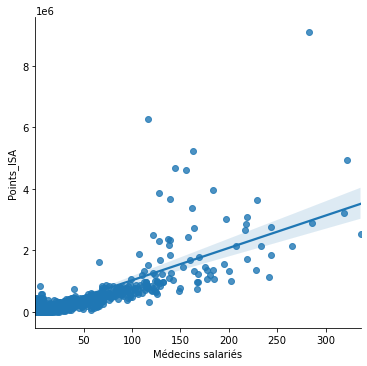

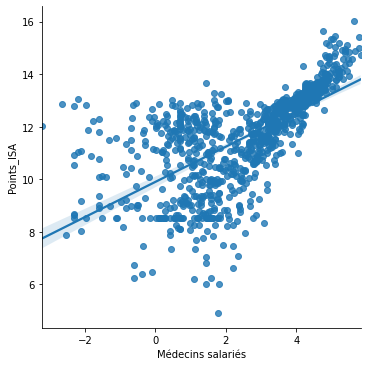

In [85]:
indexNames = df[ df['Médecins salariés'] == 0 ].index
indexNames1 = df_log[ df_log['Médecins salariés'] == 0 ].index
# Delete these row indexes from dataFrame
test = df.drop(indexNames)
test1 = df_log.drop(indexNames1)

sns.lmplot(x = 'Médecins salariés', y = 'Points_ISA', data = test, fit_reg = True)
sns.lmplot(x = 'Médecins salariés', y = 'Points_ISA', data = test1)



In [108]:
import statsmodels.api as sm
lre = scipy.stats.linregress(test2['LIT_MCO'], test2['Points_ISA'])
lre


LinregressResult(slope=1.1823256992322355, intercept=6.385579865202418, rvalue=0.8840928840882505, pvalue=0.0, stderr=0.018404786561192595)

In [97]:
test2 = df_log.fillna(0)
X = test2["Médecins salariés"]
X = sm.add_constant(X) # on ajoute une constante, sinon la régression se fait sans, par défaut
y = test2["Points_ISA"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Points_ISA   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     639.0
Date:                Fri, 07 May 2021   Prob (F-statistic):          1.55e-112
Time:                        20:38:21   Log-Likelihood:                -2031.2
No. Observations:                1155   AIC:                             4066.
Df Residuals:                    1153   BIC:                             4077.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.3191      0.05

In [98]:
test3 = df.fillna(0)
X = test3["Médecins salariés"]
X = sm.add_constant(X) # on ajoute une constante, sinon la régression se fait sans, par défaut
y = test3["Points_ISA"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Points_ISA   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     1865.
Date:                Fri, 07 May 2021   Prob (F-statistic):          3.61e-243
Time:                        20:38:23   Log-Likelihood:                -16506.
No. Observations:                1155   AIC:                         3.302e+04
Df Residuals:                    1153   BIC:                         3.303e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8144.5790   1.33e+0

In [99]:
X = test3["Médecins salariés"]
X = sm.add_constant(X) # on ajoute une constante, sinon la régression se fait sans, par défaut
y = test2["Points_ISA"]

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             Points_ISA   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     833.9
Date:                Fri, 07 May 2021   Prob (F-statistic):          2.00e-138
Time:                        20:38:29   Log-Likelihood:                -1971.6
No. Observations:                1155   AIC:                             3947.
Df Residuals:                    1153   BIC:                             3957.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                10.7022      0.04

In [102]:
df.isnull().groupby('Médecins salariés').count()

,Numero_finess,Médecins libéraux,Autres personnels médicaux libéraux,Autres personnels médicaux salariés,Personnels de direction et administratifs,Personnels des services de soins,Personnels éducatifs et sociaux,Personnels médico-techniques,Personnels techniques et ouvriers,Points_ISA,...,Taux_chomage_par_dep,Bloc_politique,Q1_A,Q1_B,Q1_C,Q1_D,Q8_A,Q8_B,Q8_C,Q8_D
Médecins salariés,,,,,,,,,,,,,,,,,,,,,
False,1149,1149,1149,1149,1149,1149,1149,1149,1149,1149,...,1149,1149,1149,1149,1149,1149,1149,1149,1149,1149
True,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6


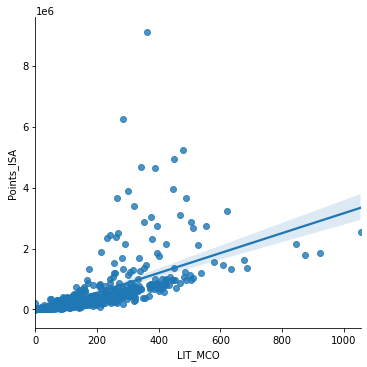

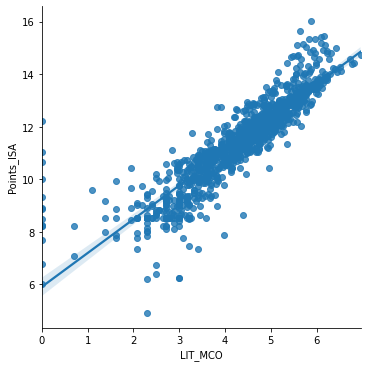

In [106]:
sns.lmplot(x = 'LIT_MCO', y = 'Points_ISA', data = df)
sns.lmplot(x = 'LIT_MCO', y = 'Points_ISA', data = df_log)


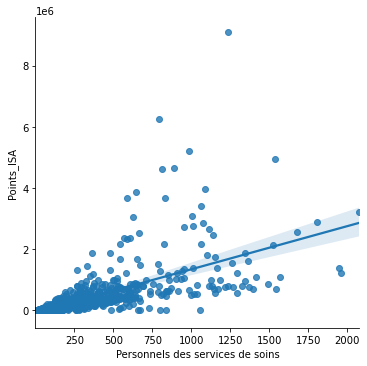

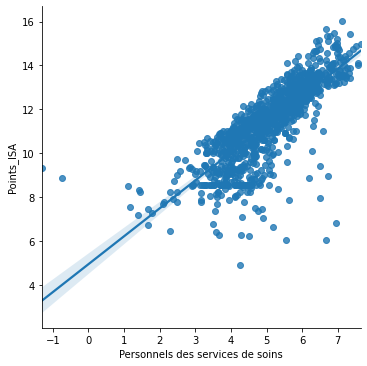

In [107]:
sns.lmplot(x = 'Personnels des services de soins', y = 'Points_ISA', data = df)
sns.lmplot(x = 'Personnels des services de soins', y = 'Points_ISA', data = df_log)

Ces représentations graphiques et régressions montrent bien la pertinence du modèle translog puisque nos variables sont bien plus corrélées log-linéairement que linéairement. 